# Logistische Regression Projekt Lösungen

In diesem Projekt werden wir mit dem "UCI adult" Datensatz arbeiten. 
Wir werden versuchen vorherzusehen ob Personen in dem Datensatz in eine bestimmte Einkommensklasse gehören, je nachdem ob sie über oder unter 50K machen.

Typischerweise werden wir die meiste Zeit damit verbringen den Datensatz zu säubern. Die Zeilen Code die das Modell dann erstellen sind meist schnell geschrieben. 
Dieses Projekt probiert dies zu veranschaulichen mit verschiedenen Problemen die beim Säubern aufkommen werden.


## Daten einlesen

**Die adult_sal.csv Datei einlesen und dann auf "adult" stellen**


In [1]:
adult <- read.csv('adult_sal.csv')

**Überprüfe den Anfag von "adult"**


In [2]:
head(adult)

,X,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**  Der Index wiederholt sich, deswegen können wir diese Spalte löschen.**

In [3]:
library(dplyr)
adult <- select(adult,-X)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



**Überprüfen wir nun den Kopf, str und die Zusammenfassung des Datensatzes. **

In [4]:
head(adult)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 9 levels "?","Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40

In [6]:
summary(adult)

      age                 type_employer       fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education_num                    marital     
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

## Datenbereinigung

Wie du vielleicht schon bemerkt hast, haben wir einige Spalten die kategorische Faktoren sind. Jedoch haben einige mehr Faktoren als wir benötigen. In diesem Datenbereinigung Schritt versuchen wir diese zu säubern indem wir die Anzahl der Faktoren reduzieren. 


### type_employer Spalte

**Benutze table() um die Häufigkeit von type_employer zu überprüfen.**


In [7]:
table(adult$type_employer)


               ?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14 

** Wie viele Werte mit Null existieren für type_employer? Was sind die zwei kleinsten Gruppen?**


In [ ]:
# 1836 Nullwerte
# 
# Never-worked und Without-pay

** Jetzt kombinieren wir die zwei kleinsten Gruppen in eine Gruppe die wir "Unemployed" nennen. Du kannst hier auch kreativ sein, denn hier gibt es viele Möglichkeiten dies zu tun. 
Tipp: Es kann hilfreich sein diese Objekte in Buchstaben umzuwandeln mit (as.character () und dann die sapply Funktion mit einer benutzerdefinierten Funktion)**


In [9]:
unemp <- function(job){
    job <- as.character(job)
    if (job=='Never-worked' | job=='Without-pay'){
        return('Unemployed')
    }else{
        return(job)
    }
}

In [10]:
adult$type_employer <- sapply(adult$type_employer,unemp)

In [11]:
table(adult$type_employer)


               ?      Federal-gov        Local-gov          Private 
            1836              960             2093            22696 
    Self-emp-inc Self-emp-not-inc        State-gov       Unemployed 
            1116             2541             1298               21 

**Welche anderen Spalten würden sich noch für eine Zusammenfassung eignen? 
Kombiniere "State-gov" und "Local-gov" zu einer neuen Kategorie: "SL-gov". 
Ebenso kannst du die Kategorien "SL-gov" und "self-employed" zu einen Kategorie "self-emp" zusammenführen**


In [12]:
group_emp <- function(job){
    if (job=='Local-gov' | job=='State-gov'){
        return('SL-gov')
    }else if (job=='Self-emp-inc' | job=='Self-emp-not-inc'){
        return('self-emp')
    }else{
        return(job)
    }
}

In [13]:
adult$type_employer <- sapply(adult$type_employer,group_emp)

In [14]:
table(adult$type_employer)


          ? Federal-gov     Private    self-emp      SL-gov  Unemployed 
       1836         960       22696        3657        3391          21 

### Spalte Beziehungsstatus 

**Benutze table() um den Beziehungsstatus zu zeigen**


In [15]:
table(adult$marital)


             Divorced     Married-AF-spouse    Married-civ-spouse 
                 4443                    23                 14976 
Married-spouse-absent         Never-married             Separated 
                  418                 10683                  1025 
              Widowed 
                  993 

** Reduziere nun dies auf drei Gruppen:**
* Married (= Verheiratet)
* Not-Married (= Unverheiratet)
* Never-Married (= Ledig)

In [16]:
group_marital <- function(mar){
    mar <- as.character(mar)
    
    # Not-Married
    if (mar=='Separated' | mar=='Divorced' | mar=='Widowed'){
        return('Not-Married')
    
    # Never-Married   
    }else if(mar=='Never-married'){
        return(mar)
    
     #Married
    }else{
        return('Married')
    }
}

In [17]:
adult$marital <- sapply(adult$marital,group_marital)
table(adult$marital)


      Married Never-married   Not-Married 
        15417         10683          6461 

### Spalte Land

** Überprüfe das Land mit table()**

In [18]:
table(adult$country)


                         ?                   Cambodia 
                       583                         19 
                    Canada                      China 
                       121                         75 
                  Columbia                       Cuba 
                        59                         95 
        Dominican-Republic                    Ecuador 
                        70                         28 
               El-Salvador                    England 
                       106                         90 
                    France                    Germany 
                        29                        137 
                    Greece                  Guatemala 
                        29                         64 
                     Haiti         Holand-Netherlands 
                        44                          1 
                  Honduras                       Hong 
                        13                         20 
         

** Hier kannst du die Länder gruppieren wie du möchtest. Es gibt hier keinen richtigen oder falschen Weg. Du solltest jedoch darauf achten, dass die Anzahl der Gruppen signifikant verkleinert wird.
Eine Möglichkeit wäre es nach Kontinenten zu gruppieren. **

In [19]:
levels(adult$country)

[1] "?"                          "Cambodia"                  
 [3] "Canada"                     "China"                     
 [5] "Columbia"                   "Cuba"                      
 [7] "Dominican-Republic"         "Ecuador"                   
 [9] "El-Salvador"                "England"                   
[11] "France"                     "Germany"                   
[13] "Greece"                     "Guatemala"                 
[15] "Haiti"                      "Holand-Netherlands"        
[17] "Honduras"                   "Hong"                      
[19] "Hungary"                    "India"                     
[21] "Iran"                       "Ireland"                   
[23] "Italy"                      "Jamaica"                   
[25] "Japan"                      "Laos"                      
[27] "Mexico"                     "Nicaragua"                 
[29] "Outlying-US(Guam-USVI-etc)" "Peru"                      
[31] "Philippines"                "Poland"                    
[33] "Portugal"                   "Puerto-Rico"               
[35] "Scotland"                   "South"                     
[37] "Taiwan"                     "Thailand"                  
[39] "Trinadad&Tobago"            "United-States"             
[41] "Vietnam"                    "Yugoslavia"

In [20]:
Asia <- c('China','Hong','India','Iran','Cambodia','Japan', 'Laos' ,
          'Philippines' ,'Vietnam' ,'Taiwan', 'Thailand')

North.America <- c('Canada','United-States','Puerto-Rico' )

Europe <- c('England' ,'France', 'Germany' ,'Greece','Holand-Netherlands','Hungary',
            'Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia')

Latin.and.South.America <- c('Columbia','Cuba','Dominican-Republic','Ecuador',
                             'El-Salvador','Guatemala','Haiti','Honduras',
                             'Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru',
                            'Jamaica','Trinadad&Tobago')
Other <- c('South')

In [21]:
group_country <- function(ctry){
    if (ctry %in% Asia){
        return('Asia')
    }else if (ctry %in% North.America){
        return('North.America')
    }else if (ctry %in% Europe){
        return('Europe')
    }else if (ctry %in% Latin.and.South.America){
        return('Latin.and.South.America')
    }else{
        return('Other')      
    }
}

In [22]:
adult$country <- sapply(adult$country,group_country)

**Benutze nun table() um diese Gruppierung zu bestätigen**

In [23]:
table(adult$country)


                   Asia                  Europe Latin.and.South.America 
                    671                     521                    1301 
          North.America                   Other 
                  29405                     663 

**Überprüfe nun str(adult) erneut. Stelle sicher, dass alle Spalten die du verändert hast einen Faktoren Level haben mit factor()**


In [24]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "SL-gov" "self-emp" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "Married" "Not-Married" "Married" ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : 

In [25]:
adult$type_employer <- sapply(adult$type_employer,factor)
adult$country <- sapply(adult$country,factor)
adult$marital <- sapply(adult$marital,factor)

Man könnte es auch so lösen:

    adult$type_employer <- factor(adult$type_employer)

In [26]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 6 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 


**Wir könnten uns jetzt noch weiter mit "education" und "occupation" befassen um die Anzahl der Faktoren dieser Spalten zu reduzieren, jedoch sollten wir jetzt weitermachen und uns um die fehlenden Daten kümmern. Du kannst diese Spalten gerne zusammenfassen um zu veranschaulichen wie diese unser Modell beeinflussen.**
 

## Fehlende Daten


### Amelia

**Installiere und starte nun das Amelia Paket**

In [27]:
#install.packages('Amelia',repos = 'http://cran.us.r-project.org')
library(Amelia)

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2016 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


**Konvertiere alle Zellen mit "?" oder " ?" Werten zu einem "NA" Wert. 
Tipp: is.na() kann hier hilfreich sein. Man könnte hier auch Klammern verwenden mit einer konditionellen Anweisung. 
Du kannst dies mit der Lösung vergleichen falls du hier Schwierigkeiten mit diesem Schritt hast.**


In [28]:
adult[adult == '?'] <- NA

**Benutze nun "table()" mit einer Spalte die "NA" Werte beinhaltet und diese sollte jetzt nicht mehr diese NA Werte anzeigen sondern "0" statt "?".

Alternativ kannst du auch diese Spalten faktorisieren. Dies kann jedoch ein bisschen Zeit in Anspruch nehmen. 
Zum Beispiel: **

In [29]:
table(adult$type_employer)


     SL-gov    self-emp     Private Federal-gov           ?  Unemployed 
       3391        3657       22696         960           0          21 

In [30]:
adult$type_employer <- sapply(adult$type_employer,factor)
adult$country <- sapply(adult$country,factor)
adult$marital <- sapply(adult$marital,factor)
adult$occupation <- sapply(adult$occupation,factor)

Du kannst es auch so lösen:

    adult$type_employer <- factor(adult$type_employer)

**Spiele ruhig ein wenig mit der missmap Funktion vom Amelia Paket rum. 
Kannst du erkennen was sie tut und wie man sie benutzt? **

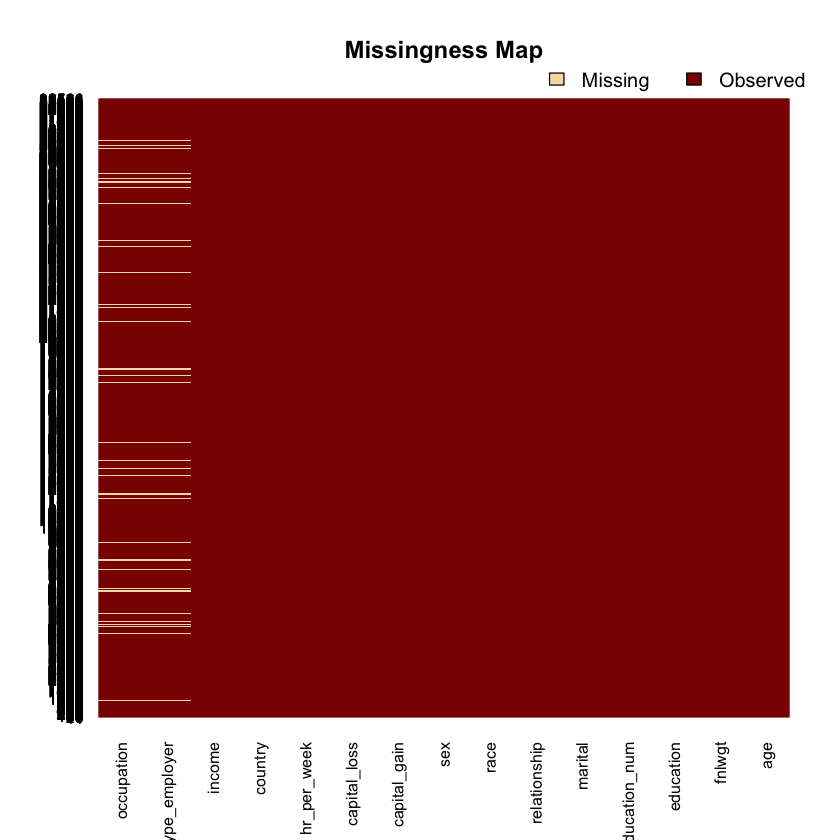

In [31]:
missmap(adult) 

** Du hast eventuell bemerkt, dass die missmap(adult) Funktion dir eine Heatmap ausgibt die dir die fehlende Werte anzeigt. Dies gibt dir einen schnellen Überblick wie viele Daten fehlen. In unserem Fall hier relative wenig. Des weiteren wirst du vermutlich auch noch bemerkt haben, dass es mehrere Benennungen der Y-Achse gibt. Diese können wir mit dem folgendem Code entfernen: 
Was macht: col=c('yellow','black')?**



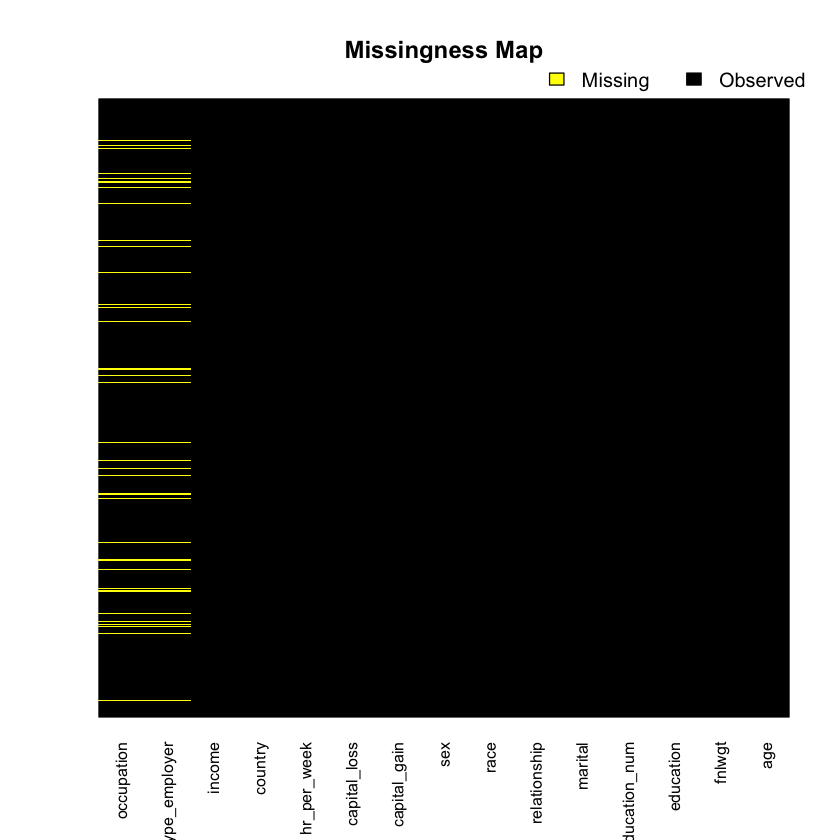

In [32]:
missmap(adult,y.at=c(1),y.labels = c(''),col=c('yellow','black')) 

**Benutzen wir nun na.omit() um die NA Werte von dem NA Datenframe zu entfernen. 
Bitte beachte, dass es immer auf den Datensatz ankommt ob dies eine gute oder schlechte Entscheidung ist. Man sollte nicht immer die "NA" Werte entfernen**



In [33]:
# Könnte einige Zeit in ansrpuch nehmen
adult <- na.omit(adult)
#str(adult)

** Benutze nun mussmap() um zu überprüfen ob auch wirklich alle "NA" Werte entfernt wurden.**

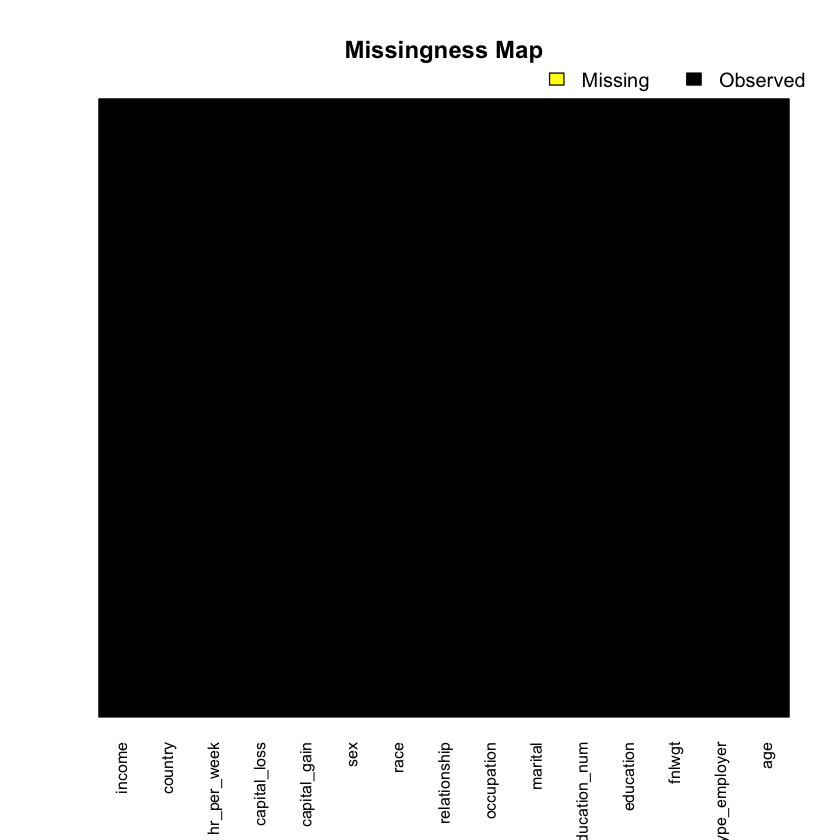

In [34]:
missmap(adult,y.at=c(1),y.labels = c(''),col=c('yellow','black')) 

# EDA

Obwohl wir den Datensatz bereinigt haben, haben wir ihn noch nicht mit Hilfe von Visualisationen untersucht. 



**Überprüfe str() der Daten**

In [35]:
str(adult)

'data.frame':	30718 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 5 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : Factor w/ 14 levels "Adm-clerical",..: 1 2 3 3 4 2 5 2 4 2 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $

**Verwende nun die ggplot2 Funktion um ein Histogramm des Alters zu erstellen das nach Einkommen (=income) eingefärbt ist.** 

In [36]:
library(ggplot2)
library(dplyr)

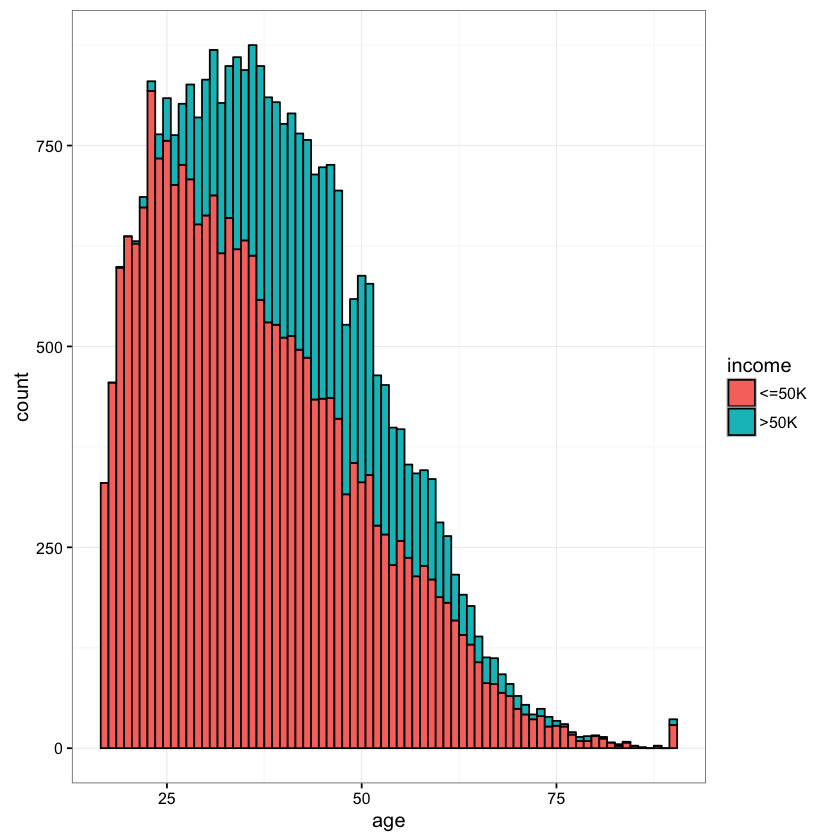

In [37]:
ggplot(adult,aes(age)) + geom_histogram(aes(fill=income),color='black',binwidth=1) + theme_bw()

** Erstelle nun ein Histogramm, dass die gearbeiteten Stunden pro Woche anzeigt.**


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


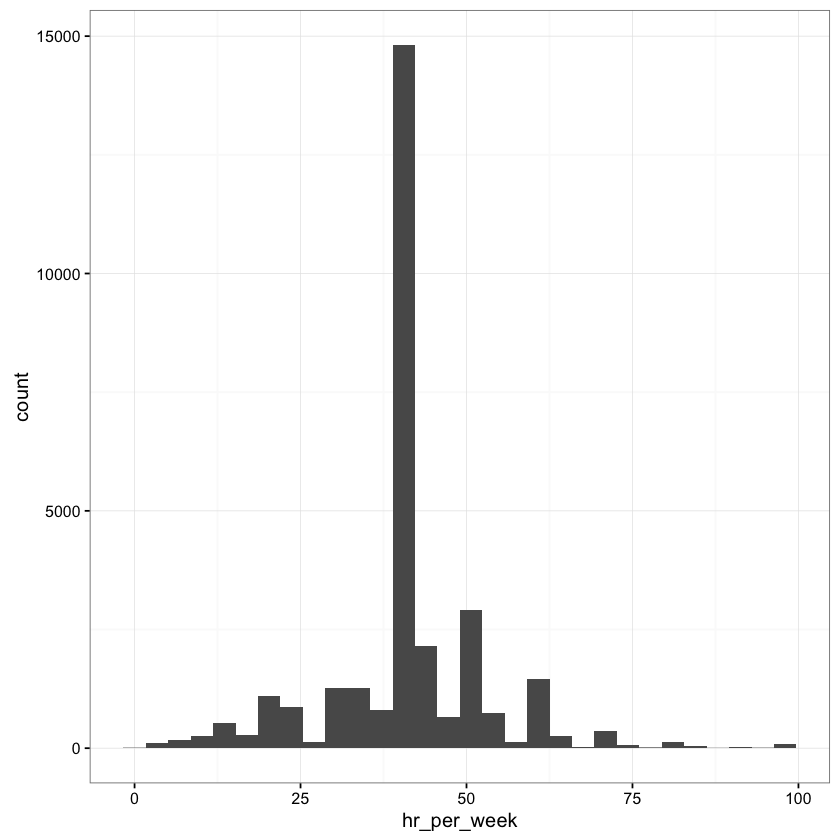

In [38]:
ggplot(adult,aes(hr_per_week)) + geom_histogram() + theme_bw()

**Benenne die Spalte Land (=country) zu Region (=region) um, um besser die Faktoren Level anzuzeigen**



In [52]:
#Hier gibt es viele Möglichkeiten dies zu tun. Man könnte auch dplyr benutzen
names(adult)[names(adult)=="country"] <- "region"

In [53]:
str(adult)

'data.frame':	30718 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 5 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : Factor w/ 14 levels "Adm-clerical",..: 1 2 3 3 4 2 5 2 4 2 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $

** Erstelle nun ein Balkendiagramm der Regionen wobei jeder Balken nach Einkommensklasse eingefärbt ist. 
Optional kannst du dir überlegen wie man die X-Achse rotieren könnte um den Text besser lesbar zu machen.**


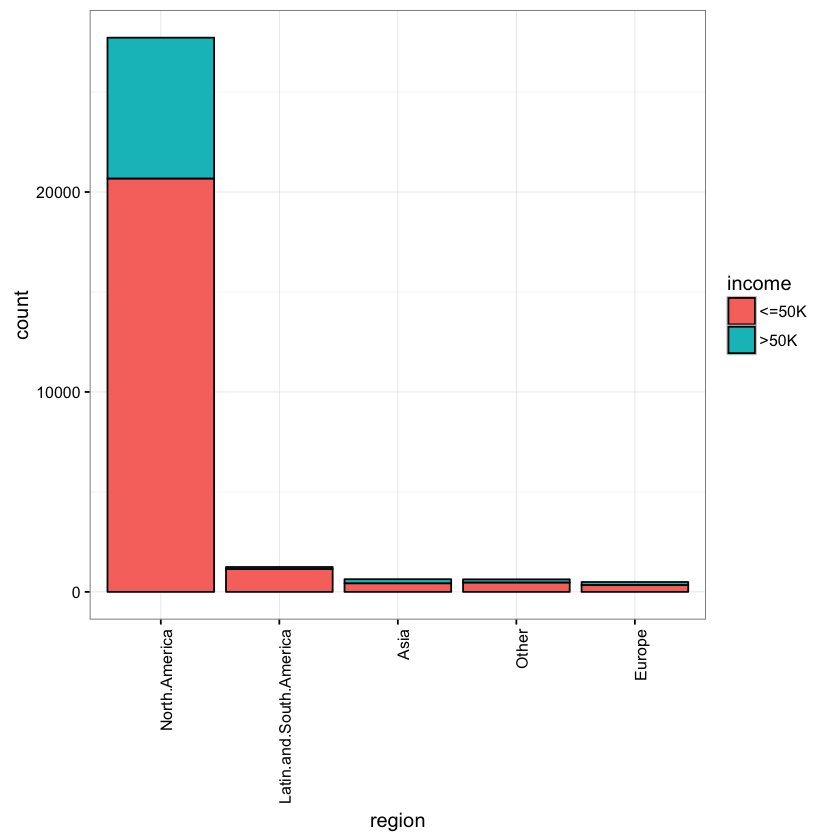

In [54]:
ggplot(adult,aes(region)) + geom_bar(aes(fill=income),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Ein Modell Erstellen

Nun erstellen wir ein Modell in dem wir die Personen in zwei Gruppen aufteilen: Über und unter 50k Einkommen. 

## Logistische Regression

Hier kannst du auf die ISLR Vorlesung zurückgreifen, um dein Wissen noch mal aufzufrischen.

Logistische Regression ist ein Typ des Klassifikationsmodells. In Klassifikationsmodellen probieren wir Ergebnisse vorherzusagen anhand von kategorisch abhängiger Variablen indem wir eine oder mehrere unabhängige Variablen benutzen. 


**Schauen wir uns zuerst die head() Funktion von "adult" an, damit wir uns einen Überblick verschaffen bevor wir beginnen das Modell zu bauen**


In [55]:
head(adult)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
1,39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HS-grad,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin.and.South.America,<=50K
6,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,North.America,<=50K


## Train Test Split 

**Genau wie wir es in früheren Lektionen schon gemacht haben werden wir zuerst den Datensatz in einen Trainier und Test Datensatz mit der caTools Bibliothek unterteilen. Du kannst dir alte Vorlesungen anschauen um dein Wissen wieder aufzufrischen**


In [59]:
# Importiere die Library
library(caTools)

# Setzte den Seed für die Zufallswerte
set.seed(101) 

# Teile die Sample Daten auf (basically randomly assigns a booleans to a new column "sample")
sample <- sample.split(adult$income, SplitRatio = 0.70) 

# Trainings Daten
train = subset(adult, sample == TRUE)

# Test Daten
test = subset(adult, sample == FALSE)

## Das Modell Trainieren
** Lerne die glm() funktion kennen indem du die Beschreibung mit Hilfe von help(glm) aufrufst.**

In [60]:
help(glm)

glm {stats},R Documentation
formula,"an object of class ""formula"" (or one that can be coerced to that class): a symbolic description of the model to be fitted. The details of model specification are given under ‘Details’."
family,"a description of the error distribution and link function to be used in the model. For glm this can be a character string naming a family function, a family function or the result of a call to a family function. For glm.fit only the third option is supported. (See family for details of family functions.)"
data,"an optional data frame, list or environment (or object coercible by as.data.frame to a data frame) containing the variables in the model. If not found in data, the variables are taken from environment(formula), typically the environment from which glm is called."
weights,an optional vector of ‘prior weights’ to be used in the fitting process. Should be NULL or a numeric vector.
subset,an optional vector specifying a subset of observations to be used in the fitting process.
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit. Another possible value is NULL, no action. Value na.exclude can be useful."
start,starting values for the parameters in the linear predictor.
etastart,starting values for the linear predictor.
mustart,starting values for the vector of means.
offset,"this can be used to specify an a priori known component to be included in the linear predictor during fitting. This should be NULL or a numeric vector of length equal to the number of cases. One or more offset terms can be included in the formula instead or as well, and if more than one is specified their sum is used. See model.offset."


**Benutze alle Features um deinen Datensatz mit dem glm() Modell zu trainieren. Übertrage das family=binomial(logit) argument in die glm Funktion** 

In [61]:
model = glm(income ~ ., family = binomial(logit), data = train)

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

**Wenn du eine Fehlermeldung angezeigt bekommst bedeutet das vermutlich, dass das Modell die Wahrscheinlichkeit der Klasse auf 0% oder 100% vorhergesagt hat**


**Überprüfe die Zusammenfassung des  Modells**

In [62]:
summary(model)


Call:
glm(formula = income ~ ., family = binomial(logit), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1163  -0.5172  -0.1965   0.0000   3.6235  

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -7.364e+00  4.245e-01 -17.346  < 2e-16 ***
age                            2.534e-02  2.007e-03  12.627  < 2e-16 ***
type_employerself-emp          7.501e-03  8.999e-02   0.083 0.933571    
type_employerPrivate           2.371e-01  7.321e-02   3.239 0.001198 ** 
type_employerFederal-gov       6.835e-01  1.266e-01   5.399 6.71e-08 ***
type_employerUnemployed       -1.346e+01  3.688e+02  -0.036 0.970888    
fnlwgt                         5.424e-07  2.085e-07   2.601 0.009291 ** 
education11th                  2.094e-01  2.570e-01   0.814 0.415384    
education12th                  3.925e-01  3.410e-01   1.151 0.249612    
education1st-4th           

** Wir haben noch viele Features. Einige wichtige, andere nicht so sehr. R kommt mit einer fantastischen Funktion namens step(). Die Funktion step() versucht iterativ, Prädiktorvariablen aus dem Modell zu entfernen, um Variablen zu löschen, die nicht signifikant zur Anpassung beitragen. Wie macht sie das? Es verwendet [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion). Lese dir  die Wikipedia-Seite für AIC durch, wenn du dies weiter verstehen willst, kannst du auch die `help(step)` ausprobieren. Dieses Niveau der Statistik ist außerhalb des Rahmens dieser Projektaufgabe, also lass uns weitermachen.**

In [63]:
help(step)

step {stats},R Documentation
object,"an object representing a model of an appropriate class (mainly ""lm"" and ""glm""). This is used as the initial model in the stepwise search."
scope,"defines the range of models examined in the stepwise search. This should be either a single formula, or a list containing components upper and lower, both formulae. See the details for how to specify the formulae and how they are used."
scale,"used in the definition of the AIC statistic for selecting the models, currently only for lm, aov and glm models. The default value, 0, indicates the scale should be estimated: see extractAIC."
direction,"the mode of stepwise search, can be one of ""both"", ""backward"", or ""forward"", with a default of ""both"". If the scope argument is missing the default for direction is ""backward"". Values can be abbreviated."
trace,"if positive, information is printed during the running of step. Larger values may give more detailed information."
keep,"a filter function whose input is a fitted model object and the associated AIC statistic, and whose output is arbitrary. Typically keep will select a subset of the components of the object and return them. The default is not to keep anything."
steps,the maximum number of steps to be considered. The default is 1000 (essentially as many as required). It is typically used to stop the process early.
k,the multiple of the number of degrees of freedom used for the penalty. Only k = 2 gives the genuine AIC: k = log(n) is sometimes referred to as BIC or SBC.
...,any additional arguments to extractAIC.


** Verwende new.model <- step(dein.modell.name) um die step() Funktion zu verwenden, um ein neues Modell zu erstellen.**

In [65]:
new.step.model <- step(model)

Start:  AIC=14112.05
income ~ age + type_employer + fnlwgt + education + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region



Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning mess


Step:  AIC=14112.05
income ~ age + type_employer + fnlwgt + education + marital + 
    occupation + relationship + race + sex + capital_gain + capital_loss + 
    hr_per_week + region



Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

                Df Deviance   AIC
<none>                14004 14112
- fnlwgt         1    14011 14117
- race           4    14019 14119
- region         4    14026 14126
- type_employer  4    14050 14150
- marital        2    14060 14164
- sex            1    14097 14203
- age            1    14165 14271
- capital_loss   1    14217 14323
- hr_per_week    1    14222 14328
- relationship   5    14288 14386
- occupation    13    14444 14526
- education     15    14718 14796
- capital_gain   1    15248 15354


** Du solltest eine Reihe von Nachrichten erhalten, die dich über den Vorgang informieren. Überprüfe das neue.model mit Hilfe von summary()**

In [66]:
summary(new.step.model)


Call:
glm(formula = income ~ age + type_employer + fnlwgt + education + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region, family = binomial(logit), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1163  -0.5172  -0.1965   0.0000   3.6235  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -7.364e+00  4.245e-01 -17.346  < 2e-16 ***
age                            2.534e-02  2.007e-03  12.627  < 2e-16 ***
type_employerself-emp          7.501e-03  8.999e-02   0.083 0.933571    
type_employerPrivate           2.371e-01  7.321e-02   3.239 0.001198 ** 
type_employerFederal-gov       6.835e-01  1.266e-01   5.399 6.71e-08 ***
type_employerUnemployed       -1.346e+01  3.688e+02  -0.036 0.970888    
fnlwgt                         5.424e-07  2.085e-07   2.601 0.009291 ** 
education11th                  2.094e-01  2.570e-01   0.

**Du solltest bemerkt haben, dass die Funktion step() alle zuvor verwendeten Funktionen beibehalten hat. Während wir die AIC-Kriterien verwendet haben, um Modelle zu vergleichen, gibt es andere Kriterien, die wir hätten verwenden können. Wenn du magst , kannst du versuchen, über den variablen Inflationsfaktor (VIF) und die vif() Funktion zu lesen, um andere Optionen für Vergleichskriterien zu erforschen. In der Zwischenzeit wollen wir weitermachen und sehen, wie gut unser Modell im Vergleich zum Testset abgeschnitten hat.**

** [Zur Wiederholung der Konfusionsmatrix kannst du folgenden Wikipedia Artikel noch mal lesen.](https://de.wikipedia.org/wiki/Beurteilung_eines_bin%C3%A4ren_Klassifikators#Wahrheitsmatrix:_Richtige_und_falsche_Klassifikationen)**

**Erstelle eine Konfusionsmatrix mit der Funktion predict mit type='response' als Argument innerhalb dieser Funktion.**

In [74]:
test$predicted.income = predict(model, newdata=test, type="response")

table(test$income, test$predicted.income > 0.5)

Warning message:
In predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == : prediction from a rank-deficient fit may be misleading

       
        FALSE TRUE
  <=50K  6372  548
  >50K    872 1423

**Du wirst  feststellen, dass wir einen schlechten Rang haben. Erfahre mehr darüber, welche Probleme dies verursachen kann, indem du dieses Dokument durchliest. 
[stackexchange post](http://stats.stackexchange.com/questions/35071/what-is-rank-deficiency-and-how-to-deal-with-it).**

**Was ist die Genauigkeit des Modells?**

In [76]:
(6372+1423)/(6372+1423+548+872)

[1] 0.8459034

**Berechne andere Leistungsmerkmale wie Rückruf (Recall) oder Präzision.**

In [77]:
#Rückruf (Recall)
6732/(6372+548)

[1] 0.9728324

In [78]:
#Präzision
6732/(6372+872)

[1] 0.9293208

** Wie gut war dieses Modell deiner Meinung nach? Welchen anderen Kontext möchtest du wissen, bevor du diese Frage beantwortest?**

Hier gibt es keine richtigen/falschen Antworten. Ich möchte nur, dass du über Genauigkeit, Präzision und Erinnerung nachdenkst. Du möchtest wissen, welche Kosten damit verbunden sind.

## Gut gemacht